<a href="https://colab.research.google.com/github/dahlia52/BOAZ_Engineering/blob/main/Docker%26Kubernetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Docker & Kubernetes

## Docker

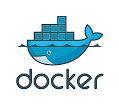

**Docker** : 컨테이너 기반의 오픈소스 가상화 플랫폼

- 소프트웨어를 **컨테이너**라는 표준화된 유닛으로 패키징

- 컨테이너 환경에서 **독립적으로 애플리케이션을 실행**할 수 있도록 컨테이너를 만들고 관리하는 것을 도와주는 도구

- 애플리케이션을 실행하면 독립적인 환경에서 **일관된 결과**를 보장

#### Docker 특징

- **확장성 / 이식성**

  - Docker가 설치되어 있으면 어디서든 컨테이너 실행 가능

  - 오픈소스이기 때문에 특정 회사나 서비스에 종속X

  - 배포뿐만 아니라 쉽게 개발서버를 만들 수 있고, 테스트 서버 생성도 간편함.

- **표준성**
  - Docker를 사용하지 않을 경우, ruby, nodejs, go, php 등으로 만든 서비스들의 설치 프로그램이나 배포 방식이 모두 다름. 
  - 컨테이너라는 표준으로 서버를 배포하므로 **모든 서비스들의 배포과정이 동일**해짐. (docker compose up이라는 명령어로 배포 과정이 표준화됨)

- **이미지**

  -어플리케이션 실행에 필요한 독립적인 환경을 포함하며 런타임 환경을 위한 일종의 템플릿
  - 읽기 전용(스냅샷)이며 특정 시점의 애플리케이션과 가상 환경을 나타냄.
  - 컨테이너는 수정이 가능하지만, 이미지는 시작하거나 실행할 수 없음.
  - 이미지에서 컨테이너를 생성하기 때문에 반드시 이미지를 만드는 과정이 필요함.
  - Dockerfile(스크립트)을 이용하여 이미지를 만들고 처음부터 재현이 가능함.
  - build 서버에서 이미지를 만들면 해당 이미지를 이미지 저장소에 저장하고 운영 서버에서 이미지를 불러올 수 있음.

- **설정관리**
  - 보통 환경변수로 설정을 제어함.
  - MYSQL_PASS = password와 같이 컨테이너를 띄울 때 환경변수를 같이 지정함. 
  - 하나의 이미지가 환경변수에 따라 동적으로 설정파일을 생성하도록 만들어져야 함. 

- **자원관리**
  - 컨테이너는 삭제 후 새로 만들면 모든 데이터가 초기화됨. (가상 공간에 프로세스가 마련되는 것이기 때문에 사라질 위험이 있음.)
  - 업로드 파일을 외부 스토리지와 링크하여 사용하거나 S3과 같은 별도의 저장소가 필요함.
  - 세션이나 캐시를 memcached나 redis와 같은 외부로 분리함.

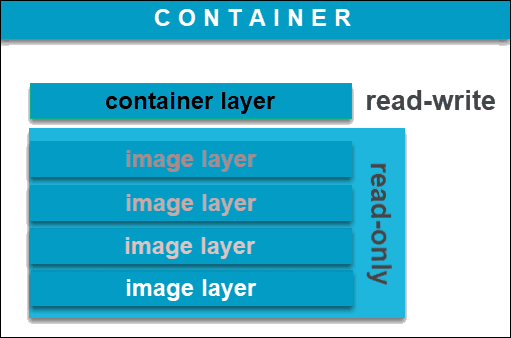

## Docker vs Virtual Machine

#### Virtual Machine

**Virtual Machine** : abstraction of physical hardware turning one server into many servers

- 컴퓨팅 환경을 SW로 구현한 것. 컴퓨터 시스템을 Emulation(가상화)하는 SW

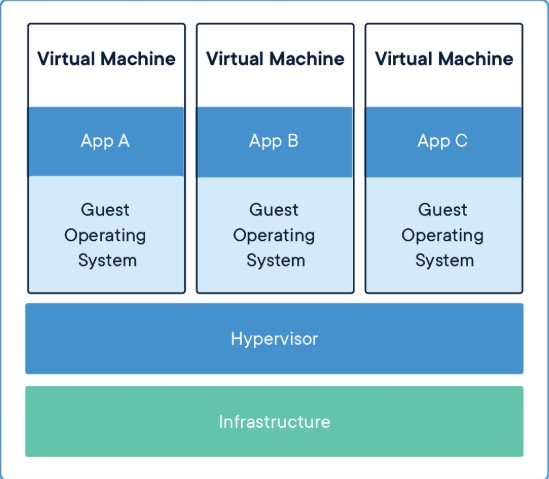

특징

- 하나의 서버 위에 Host OS가 존재하고 그 위에  Guest OS가 내장된 Virtual Machine(VM)이 각각 존재

- 호스트 컴퓨터에서 다수의 OS를 동시에 실행하도록 도와주는 Hypervisor(VM을 생성하고 실행하는 프로세스)가 존재

- VM 속에 OS와 애플리케이션 및 애플리케이션 런타임(라이브러리, dependencies, tool, code등)이 encapsulated되어 있음

- 각각의 프로젝트마다 각각 다른 가상 os에서 실행할 수 있음

- whole machine encapsulated되어 있으므로 보안성이 좋음.

문제점
- **Overhead**
  - 모든 Virtual OS는 실제 컴퓨터와 동일함. (하나의 독립된 커널 공간을 가짐)
  - 가상 OS가 많을수록 실제 컴퓨터의 자원을 많이 잡아먹게 됨. -> 많은 공간 차지, 속도 느림
  - 메모리가 자원이 유동적으로 관리되는 것이 아니라 처음부터 정해져 있기 때문에 비효율적임.

- **Difficulty of Sharing**
  - 캡슐화된 각각의 VM을 공유하는 것은 (상대적으로) 어려움.

#### Container

**Container** : abstraction at the app layer that packages code and dependencies together



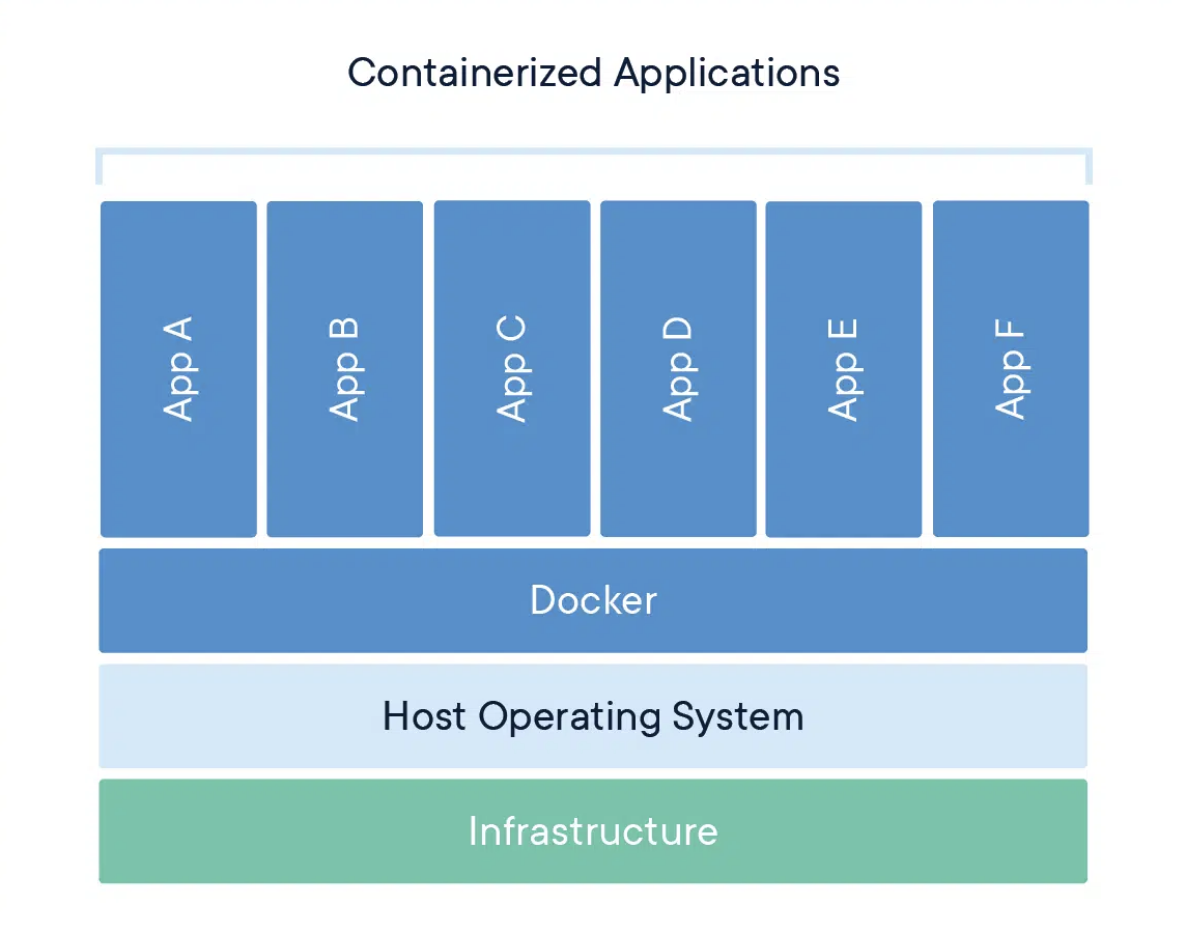

특징

- Host OS의 커널을 공유함. -> 여러 OS가 필요X

- Guest OS의 이미지를 사용X -> 가벼움, 메모리가 덜 소모됨.

- 백업, 전송, 공유가 VM보다 상대적으로 쉬움.

## Docker 의 구성요소

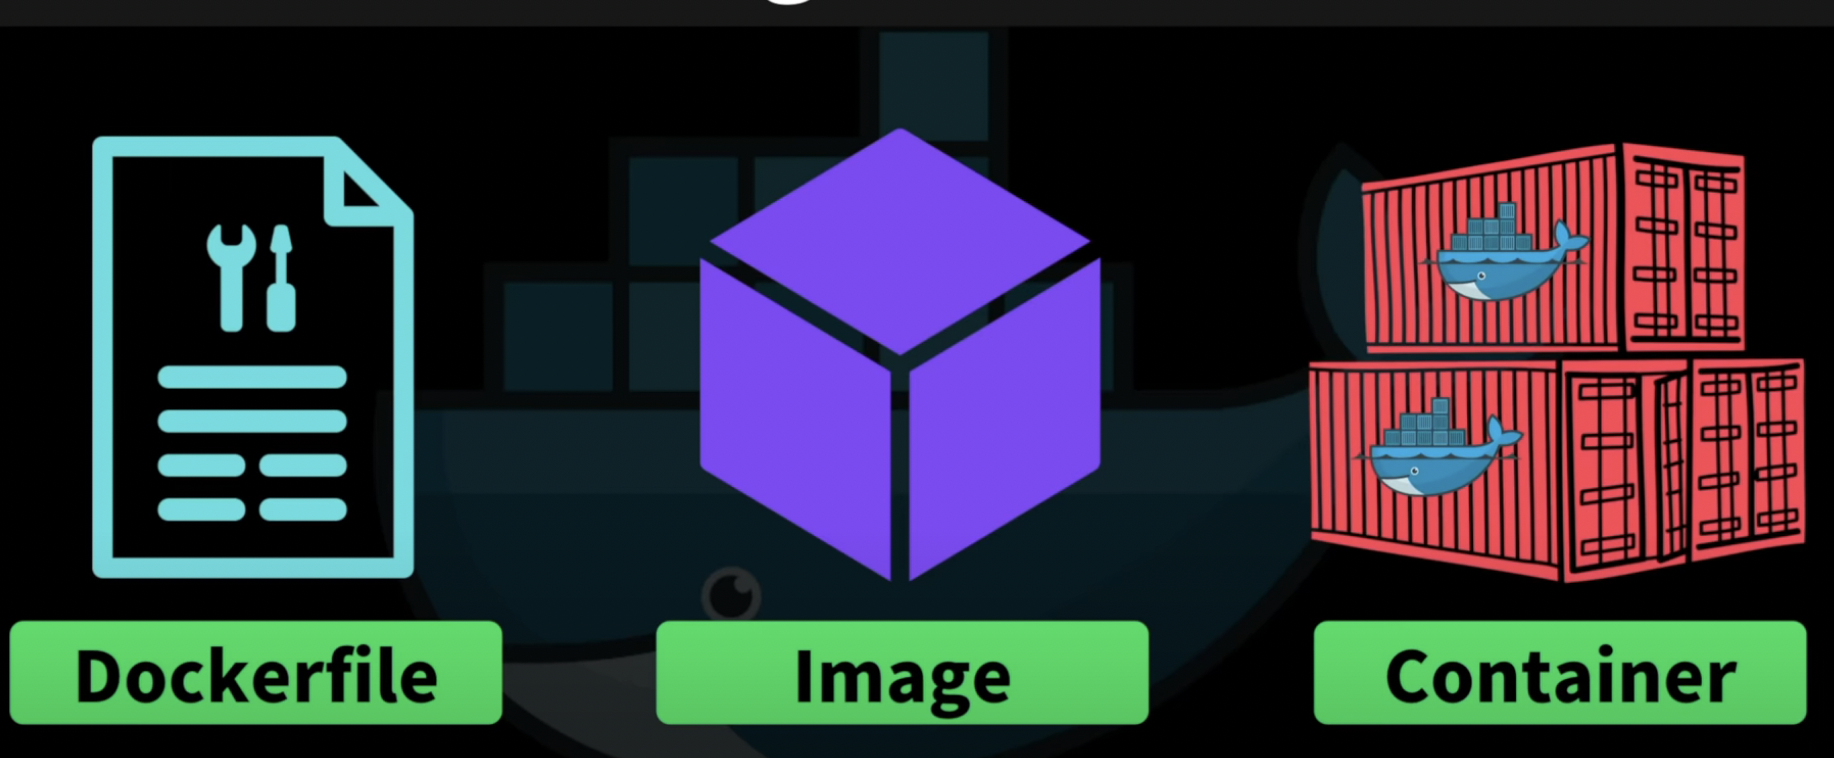

#### Dockerfile

**Dockerfile**

- 컨테이너를 어떻게 만들어야 하는지에 대한 **설명서**
- 이미지를 빌드하려면 이미지를 만들고 실행하는 데 필요한 **단계를 정의**하는 간단한 구문

- 구성요소: 구동시 필요한 각종 파일, 외부 dependency (프레임워크, 라이브러리 등), 환경변수, 어떻게 구동해야 하는지 실행할 script

- Dockerfile 내의 명령어는 이미지의 layer를 만듦.

#### Docker Image

**Docker Image** : Container의 설계도

- Docker Image는 **컨테이너 실행에 필요한 파일**과 **설정값**등을 포함하고 있음.

- Dockerfile을 통해 이미지가 생성됨.

- 컨테이너에 따른 **상태값이 변하지 않으므로** 라이브러리의 버전이 바뀜에 따른 의존성 문제가 발생X -> **Image의 불변성**

- 컨테이너는 이미지를 실행한 상태에며, 변하는 값은 컨테이너에 저장됨.

- 같은 이미지에서 여러 개의 컨테이너를 생성 가능함.

#### Docker Container

**Docker Container**

- 빌드된 이미지를 통해서 컨테이너가 생성됨.

- 컨테이너 안에서 어플리케이션이 동작함.

- 동일한 컨테이너는 항상 동일한 어플리케이션과 실행(execution)을 보장

- Image와 달리 컨테이너에서는 **내부 파일 생성, 수정, 삭제 등 변경**이 가능함.

## Kubernetes

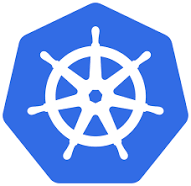

특징

- 컨테이너화된 **애플리케이션의 배포, 확장 및 관리를 자동화**하는 오픈 소스 시스템

- 단순한 컨테이너 플랫폼이 아닌 마이크로서비스, 클라우드 플랫폼을 지향

- 컨테이너로 이루어진 것들을 손쉽게 담고 관리할 수 있는 그릇 역할

- 컨테이너화된 애플리케이션 환경(Containerized Application)을 탄력적으로 실행할 수 있게 도와줌. 

  ex. 웹 서버 이용자가 많아지면 니즈에 맞춰 자동으로 컨테이너 생성

기능

- **Service Discovery와 Load Balancing** : DNS 이름을 사용하거나 자체 IP 주소를 사용하여 컨테이너 노출

- **Storage Orchestration** : 로컬 저장소, 공용 클라우드 공급자 등과 같이 원하는 저장소 시스템을 자동으로 탑재

- **자동화된 Rollout과 Rollback** : 원하는 상태를 서술하고 현재 상태를 원하는 상태로 설정한 속도에 따라 변경 가능

- **자동화된 Bin Packing** : 각 컨테이너가 필요로 하는 CPU와 메모리(RAM)를 제공

- **자동화된 복구 (self-healing)** : 실패한 컨테이너를 다시 시작하고 컨테이너를 교체 (많은 컨테이너 배포 시 죽음 -> 모니터링해서 재시작을 도와줌.)

- **시크릿과 구성 관리** : 암호, OAuth 토큰 및 SSH 키와 같은 중요한 정보를 저장하고 관리

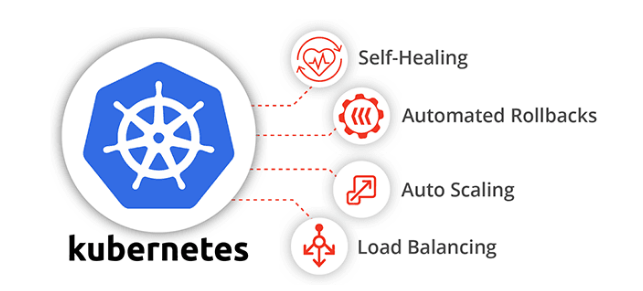

## Docker 실습

https://labs.play-with-docker.com/#

#### Git clone을 통해 node-js로 만든 간단한 서버 clone

In [ ]:
git clone https://github.com/chestnut1717/docker-training.git

In [ ]:
cd docker-training

- Dockerfile 생성 (i 눌러서 수정 후 esc,  : 누르고 wq)

In [ ]:
vi Dockerfile

**FROM**

- 하나의 Docker image는 base image부터 시작해서 기존 이미지 위에 새로운 이미지를 중첩해 여러 단계의 image layer를 쌓아가며 만들어짐.

- FROM 명령어는 이 base image를 지정해주는 역할

  ```
  # 형식
  FROM <image>:<tag>

  # ubuntu 최신 버전을 base 이미지로 사용
  FROM ubuntu:latest
  ```



**WORKDIR**

- shell 명령문의 cd 명령문처럼 컨테이너 상의 **작업 디렉토리 전환**을 위해 사용

- 작업 디렉토리를 전환하면 그 이후에 등장하는 모든 RUN, CMD, ENTRYPOINT, COPY, ADD 명령문은 해당 디렉터리를 기준으로 실행

- 존재하지 않는 디렉토리를 생성하지는 않음.

  ```
  WORKDIR <path to move>


**COPY**

- 호스트 OS 파일 또는 디렉토리를 컨테이너 안의 경로로 복사

- **단순히 복사**만을 처리할 때 사용

- ADD와 차이점은 ADD는 **원격 파일 다운로드** 또는 **압축 해제** 같은 기능 가짐

  ```
  COPY [--chown=<user>:<group>] <src>... <dest>
  ```

**RUN**

- shell에서 command를 실행하는 것처럼 image 빌드 과정에서 필요한 커맨드 실행하기 위해 사용

- Docker file로부터 docker image를 빌드하는 순간에 실행되는 명령어

- 보통 특정 소프트웨어, 라이브러리를 설치하기 위해 사용

  ```
  RUN ["<커맨드>", "<파라미터1>", "<파라미터2>"]
  RUN <전체 커맨드>

  # -curl 도구 설치
  RUN apk add curl
  ```

**EXPOSE**

- 네트워크 상에서 컨테이너로 들어오는 트래픽을 리스닝(listening)하는 포트와 프로토콜을 지정하기 위해 사용

- 프로토콜은 TCP, UDP중 설정 가능, 기본값은 TCP

- 지정된 포트는 해당 컨테이너 내부에서만 유효하며, 호스트 컴퓨터에서는 이 포트를 바로 접근 불가

- 호스트 컴퓨터로부터 해당 포트로의 접근을 허용하려면, docker run의 -p 옵션을 통해 컴퓨터의 특정 포트를 포워딩해줘야 함.

  ```
  EXPOSE <포트>
  EXPOSE <포트>/<프로토콜>
  ```

**CMD**

- 이미지로부터 컨테이너를 생성하여 **최초로 실행**될 때 수행

- 해당 이미지를 컨테이너로 띄울 때 default로 실행할 command

- ENTRYPOINT 명령문으로 지정된 커맨드에 default로 넘길 파라미터 지정할 때 사용
- RUN과 차이점은, CMD는 이미지를 컨테이너로 띄울 때 한번 실행 기회. 이 기회마저도 docker run 커맨드에 인자를 넘길 경우 상실됨.

  ```
  CMD ["<커맨드>", "<파라미터1>", "<파라미터2>"]
  CMD ["<파라미터1>", "<파라미터2>"]
  CMD <전체 커맨드>
  ```


In [ ]:
FROM node:12-alpine

WORKDIR /app

COPY package.json .

RUN npm install

COPY . .

EXPOSE 3000

CMD ["node", "server.js"]

- 이미지 빌드

In [ ]:
docker build .

- 이미지 보기

In [ ]:
docker images

#### 컨테이너 실행

- 외부 host port를 컨테이너의 3000번 포트와 연결

- Image ID 입력 시, 첫번째 몇 개의 알파벳만 입력하면 됨. 
  
  (just enough to have a unique identifier)

In [ ]:
docker run -p 80:3000 -d <image ID>

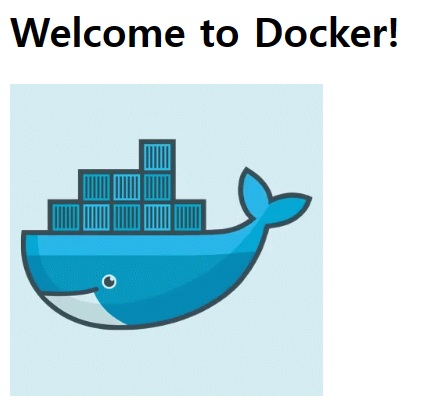

- 현재 실행중인 컨테이너 정보 보기 

  **ps** (process status)

In [ ]:
docker ps

#### 이미지 배포

https://hub.docker.com/

- 도커 로그인

In [ ]:
docker login

- 이미지 배포를 위해 이름을 붙임

In [ ]:
docker tag <image ID> <dockerhub ID>/boaz-docker

- dockerhub에 push

In [ ]:
 docker push <dockerhub ID>/boaz-docker

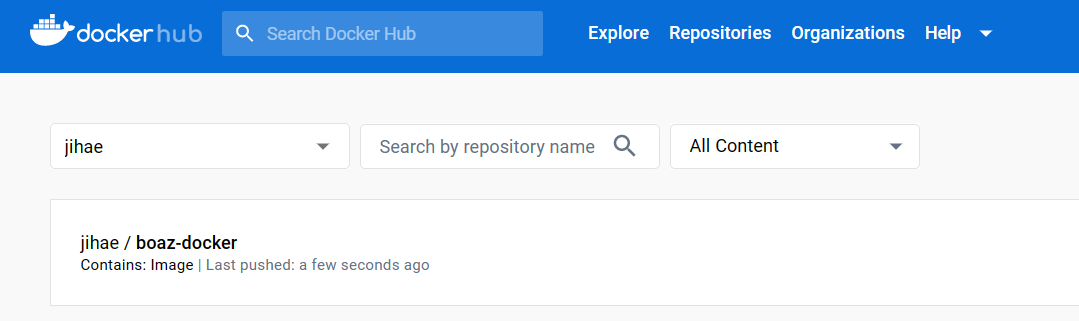

#### 컨테이너, 이미지 삭제

- 컨테이너와 이미지를 삭제하기 전에는 현재 구동 중인 컨테이너를 모두 정지해야 함.

- 컨테이너 정지 명령어

In [ ]:
docker stop <container ID>

- 컨테이너 삭제 명령어

In [ ]:
docker rm <container ID>

- 이미지 삭제 명령어

In [ ]:
docker rmi <image ID>

참고 문헌)

BOAZ Engineering 발표 자료

https://taetoungs-branch.tistory.com/163


https://tech.ktcloud.com/67